 **Made By :-  Ashu Kumar**

# <center>Titanic Survival - EDA</center>

The goal of this project is to build a prediction model that predicts weather a passenger on the Titatic survived or not.Here's a brief description of the columns:

+ PassengerId: A unique identifier for each passenger.
+ Survived: Indicates whether a passenger survived (1) or did not survive (0).
+ Pclass: The passenger's class (1st, 2nd, or 3rd class).
+ Name: The name of the passenger.
+ Sex: The gender of the passenger (male or female).
+ Age: The age of the passenger.
+ SibSp: The number of siblings/spouses aboard.
+ Parch: The number of parents/children aboard.
+ Ticket: The ticket number.
+ Fare: The fare paid for the ticket.
+ Embarked: The port at which the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).



**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('titanicprediction.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
df.shape

(418, 12)

**Conduct an examination of the columns present in the dataset.**

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.describe(include=['object','bool'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**Conduct an examination of the distinct values present in each column of the dataset.**

In [9]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Exclude the 'Cabin' column from the dataset due to its predominantly missing values.**

In [11]:
df = df.drop('Cabin', axis=1)

**Impute missing values in the remaining columns by replacing them with their respective mean values**

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

**Again Check the missing Values.**

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Check duplicated values in the dataset**

In [15]:
df.duplicated().sum()

0

## Data Visualization

**Let's make seperate list of categorical and numerical variables**

In [16]:
cat_var = ['Pclass', 'Sex']
num_var = ['Age', 'Fare']

In [17]:
df['Survived'].value_counts(normalize=True)*100

0    63.636364
1    36.363636
Name: Survived, dtype: float64

There are 36.36% passengers who survived Titanic disaster and 63.64% passengers who did not survive.

**Visualize the survival outcomes of individuals**

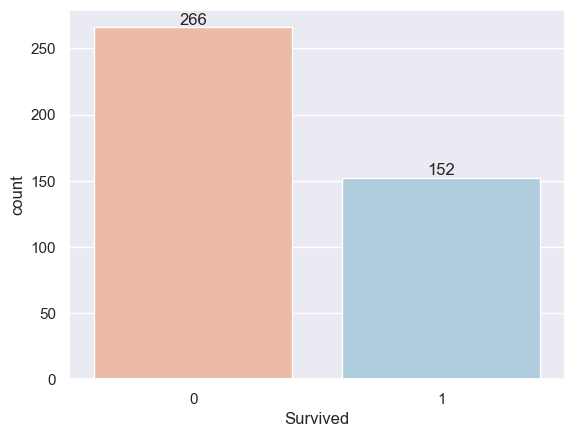

In [18]:
ax = sns.countplot(x=df['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

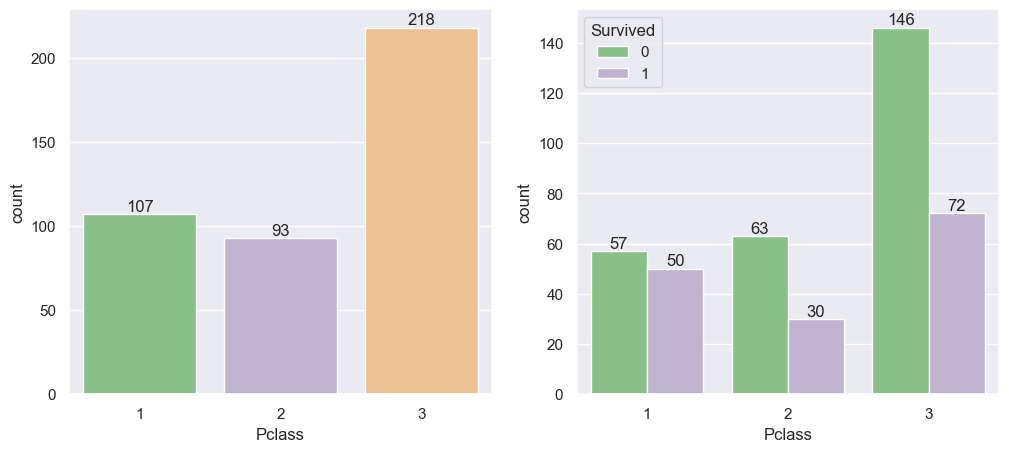

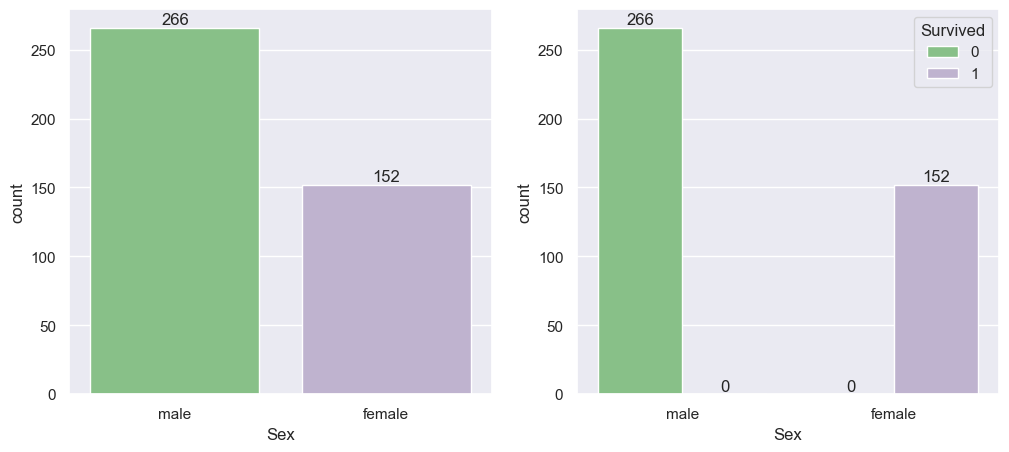

In [19]:
for column in cat_var:   
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Accent')
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

+ The number of not surviving passengers is high for passenger class 3 and 2.
+ The graph shows all of the females survived the disaster and all of the males did not survive the disaster.

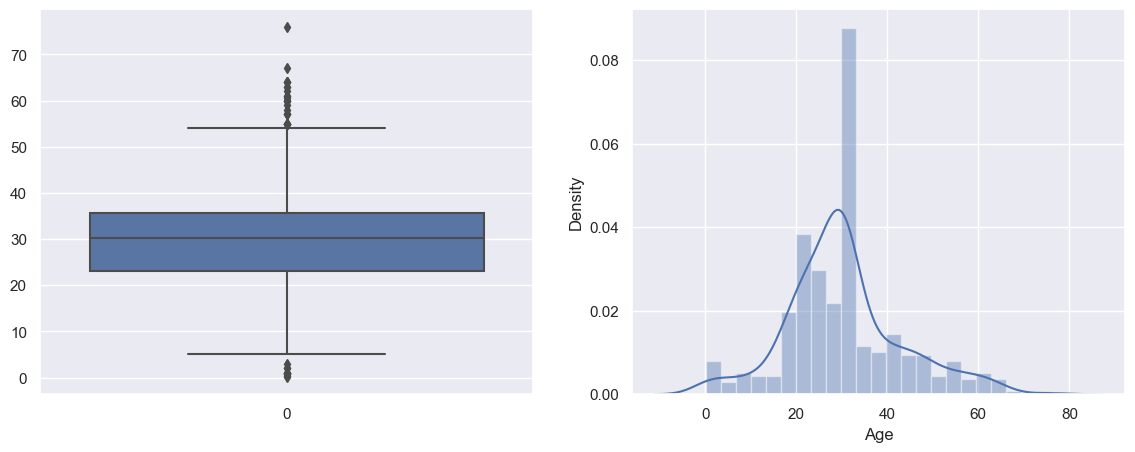

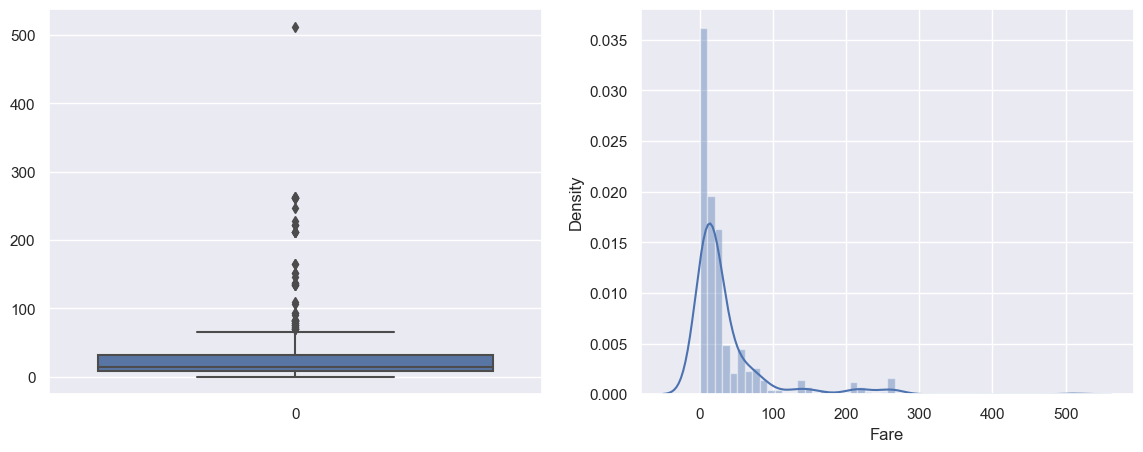

In [20]:
for column in num_var:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

+ There are some outliers in 'Age' variable and the distribution of 'Age' shows that the most of the passengers were aged between 20 and 40 years.
+ There are several outliers in 'Fare' variable and the distribution of 'Fare' is right skewed.

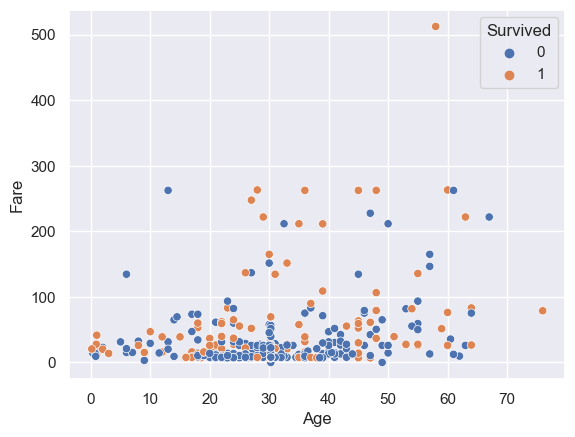

In [21]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

The graph shows that the passengers with high fares had more chance of survival.

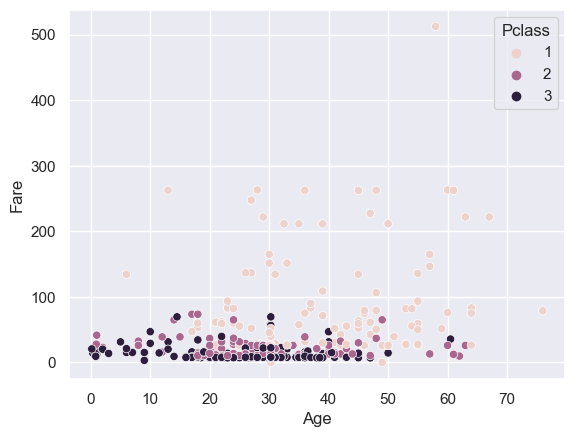

In [22]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.show()

The Graph Shows that the passengers in Class 1 is mostly above 30 age

**Let's drop bad features before modeling**

In [23]:
df = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


**Replace the alphabateical values into numerical values**

In [24]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


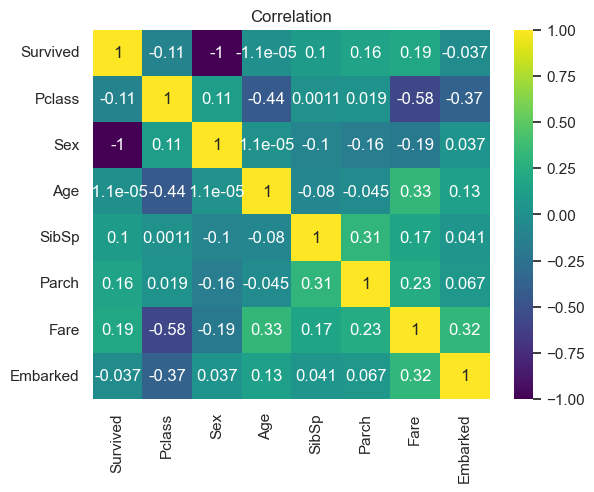

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()